<a href="https://colab.research.google.com/github/ich-20211101/ML_study/blob/main/customerSegmentation_targetedMarketing_strategys/final_sy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/ich-20211101/ML_study/refs/heads/main/customerSegmentation_targetedMarketing_strategys/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [10]:
df.nunique()

,0
CustomerID,200
Gender,2
Age,51
Annual Income (k$),64
Spending Score (1-100),84


Data Exploration
- The dataset contains 200 customer records and 5 columns
- No missing values were found in any column
- Gender is a categorical variable / Age, Annual Income, and Spending Score are numeric


In [11]:
from sklearn.preprocessing import StandardScaler

df_selected = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

df_scaled = pd.DataFrame(scaled_data, columns=df_selected.columns)

df_scaled.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


Data Preprocessing
- Selected features for clustering: Age, Annual Income, and Spending Score
- Applied standardScaler to normalize the data: K-Means uses distance to group data so if we don’t normalize, features that have bigger numbers can affect the results too much

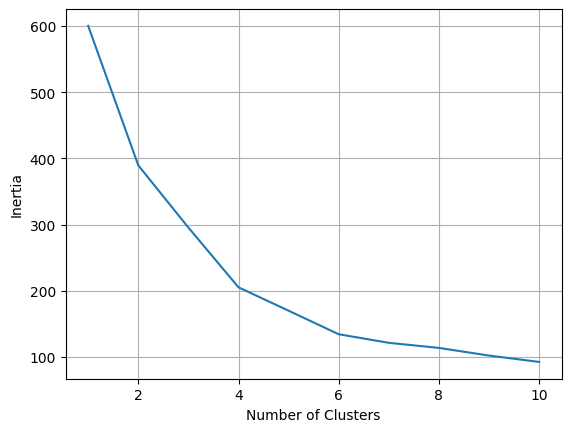

In [28]:
from sklearn .cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# elbow plot
plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [23]:
k = 5
kmeans = KMeans(n_clusters = k, random_state = 42)
cluster_labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = cluster_labels
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [25]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
display(cluster_summary)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.3,47.6,41.7
1,32.9,86.1,81.5
2,25.8,26.1,74.8
3,26.7,54.3,40.9
4,44.4,89.8,18.5


Customer Segmentation
- I picked k = 5 since inertia still drops a lot and it helps me split customers into more detailed groups
- Cluster 0: Older group with low income, average spending
- Cluster 1: Young, high income, high spending
- Cluster 2: Young, low income, but high spending
- Cluster 3: Young average group
- Cluster 4: Older, rich but low spending

In [29]:
df_with_cluster = df.copy()
df_with_cluster['Cluster'] = kmeans.labels_

df_with_cluster.to_csv('clustered_customers.csv', index=False)